In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [53]:
image = cv2.imread('image1.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
face = face_classifier.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))

(-0.5, 5999.5, 3886.5, -0.5)

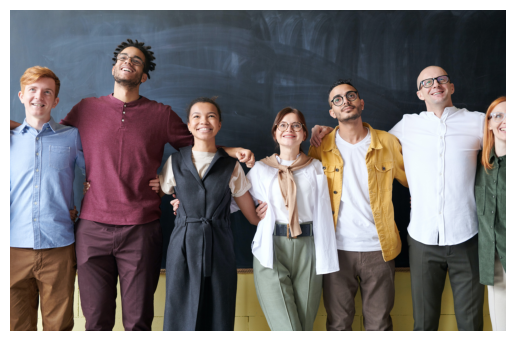

In [13]:
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')

In [16]:
# reverse the faces.
image2 = image.copy()
for (x,y,w,h) in face:
    face_region = image[y:y+h, x:x+w]

    transformed_face = np.fliplr(face_region)

    image2[y:y+h, x:x+w] = transformed_face

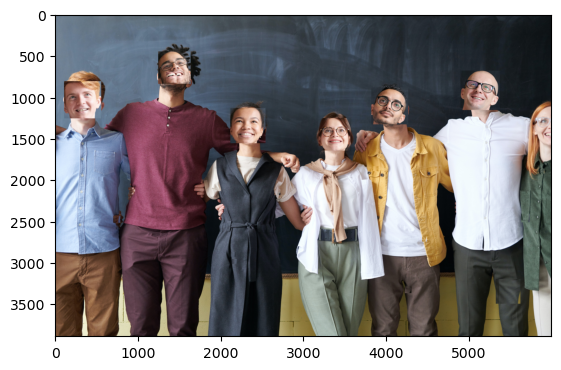

In [17]:
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

In [33]:
# reverse the faces.

def rotate90Clockwise(A):
    N = len(A[0])
    for i in range(N // 2):
        for j in range(i, N - i - 1):
            temp = A[i][j]
            A[i][j] = A[N - 1 - j][i]
            A[N - 1 - j][i] = A[N - 1 - i][N - 1 - j]
            A[N - 1 - i][N - 1 - j] = A[j][N - 1 - i]
            A[j][N - 1 - i] = temp
    return A

image3 = image.copy()
for (x,y,w,h) in face:
    face_region = image[y:y+h, x:x+w]

    transformed_face = rotate90Clockwise(face_region)

    image3[y:y+h, x:x+w] = transformed_face

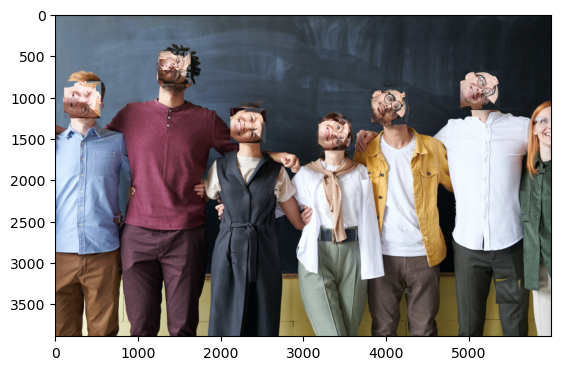

In [34]:
plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))

In [30]:
def rotate_180(array, M, N, out):
    for i in range(M):
        for j in range(N):
            out[i, N-1-j] = array[M-1-i, j]
    return out

image4 = image.copy()
for (x,y,w,h) in face:
    face_region = image[y:y+h, x:x+w]

    transformed_face = rotate_180(face_region, h, w, face_region.copy())

    image4[y:y+h, x:x+w] = transformed_face

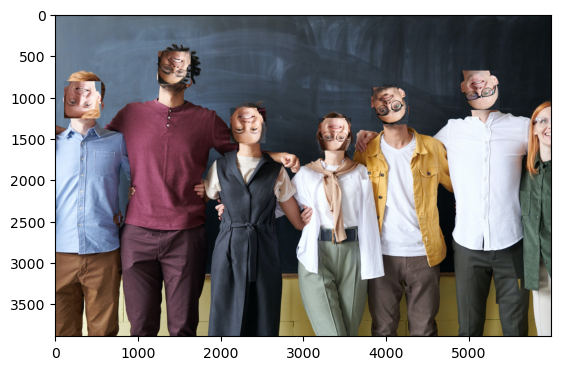

In [31]:
plt.imshow(cv2.cvtColor(image4, cv2.COLOR_BGR2RGB))